**Load and Explore the Protocol File**


Read the CM protocol file (since it contains information about spoofing attacks).
Inspect its structure.
Extract important details.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Correct paths
base_path_LA = "/content/LA/LA/ASVspoof2019_LA_cm_protocols"
base_path_PA = "/content/PA/PA/ASVspoof2019_PA_cm_protocols"

# Protocol file paths
protocol_files = {
    "LA_train": os.path.join(base_path_LA, "ASVspoof2019.LA.cm.train.trn.txt"),
    "LA_dev":   os.path.join(base_path_LA, "ASVspoof2019.LA.cm.dev.trl.txt"),
    "LA_eval":  os.path.join(base_path_LA, "ASVspoof2019.LA.cm.eval.trl.txt"),
    "PA_train": os.path.join(base_path_PA, "ASVspoof2019.PA.cm.train.trn.txt"),
    "PA_dev":   os.path.join(base_path_PA, "ASVspoof2019.PA.cm.dev.trl.txt"),
    "PA_eval":  os.path.join(base_path_PA, "ASVspoof2019.PA.cm.eval.trl.txt"),
}

# Load a single protocol file
def load_protocol(file_path, dataset_name):
    df = pd.read_csv(file_path, sep=" ", header=None, names=["SpeakerID", "AudioID", "Col1", "Col2", "AttackType"])
    df.drop(columns=["Col1", "Col2"], inplace=True)
    df["Dataset"] = dataset_name[:2]   # LA or PA
    df["Split"] = dataset_name[3:]     # Train, Dev, or Eval
    return df

# Load and combine all files
df_list = [load_protocol(file, name) for name, file in protocol_files.items()]
df_all = pd.concat(df_list, ignore_index=True)

# Display preview
print(df_all.head())

# Count attacks
print(df_all["AttackType"].value_counts())


  SpeakerID       AudioID AttackType Dataset  Split
0   LA_0079  LA_T_1138215   bonafide      LA  train
1   LA_0079  LA_T_1271820   bonafide      LA  train
2   LA_0079  LA_T_1272637   bonafide      LA  train
3   LA_0079  LA_T_1276960   bonafide      LA  train
4   LA_0079  LA_T_1341447   bonafide      LA  train
AttackType
spoof       298518
bonafide     41373
Name: count, dtype: int64


**Numbers of Real and Fake Audios**

In [ ]:
# Define the base path where audio files are stored
audio_base_path = "/content/LA/ASVspoof2019_LA_train/flac"  # Update if needed

# Extract real and fake file paths from your dataset DataFrame
df_all["FilePath"] = df_all["AudioID"].apply(lambda x: os.path.join(audio_base_path, x + ".flac"))

# Get the lists of real and deepfake audio files
real_files = df_all[df_all["AttackType"] == "bonafide"]["FilePath"].tolist()
fake_files = df_all[df_all["AttackType"] != "bonafide"]["FilePath"].tolist()

# Print the number of files detected
print(f"✅ Found {len(real_files)} real audio files")
print(f"✅ Found {len(fake_files)} deepfake audio files")


✅ Found 41373 real audio files
✅ Found 298518 deepfake audio files


A total of 298,518 spoofed samples together with 41,373 bonafide samples exist in the dataset. The dataset displays an extreme imbalance between spoofed and bonafide samples because it contains many more spoofed samples.

**Distribution of Real vs. Fake Across LA & PA**

* Load and Combine Protocol Files for Both LA & PA
* Analyze the Distribution of Real vs. Fake Samples (Across LA & PA)
* Analyze the Distribution of Spoofing Attacks (Across LA & PA)
* Analyze Speaker Distribution
* Visualize Dataset Splits for LA & PA
* Prepare for Audio Feature Extraction

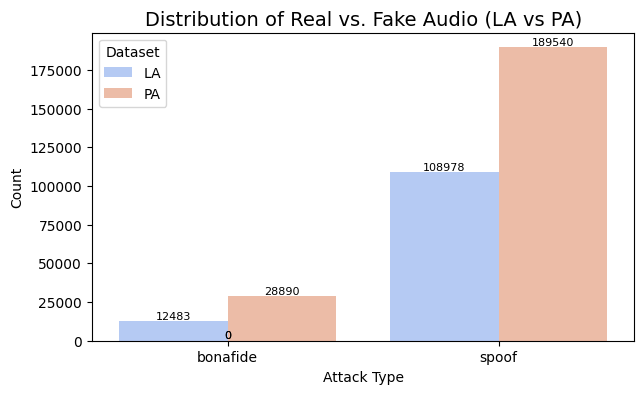

In [ ]:
plt.figure(figsize=(7, 4))

# Create the count plot
ax = sns.countplot(data=df_all, x="AttackType", hue="Dataset", palette="coolwarm")

# Loop through the bars and add text labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to an integer for display
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning
                ha='center', va='bottom',  # Align to center
                fontsize=8)

# Titles and labels
plt.title("Distribution of Real vs. Fake Audio (LA vs PA)", fontsize=14)
plt.xlabel("Attack Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.legend(title="Dataset")

plt.show()

Observation data indicated that the plot spoofed samples exceeded bonafide samples in both LA and PA systems while Physical Access (PA) contained more bonafide samples than Logical Access (LA).

**Distribution of Spoofing Attack Types in LA & PA**

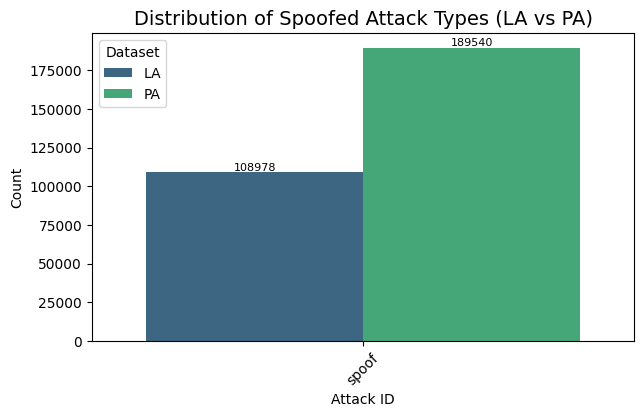

In [ ]:
# Extract Attack IDs (only for spoofed data)
df_spoof = df_all[df_all["AttackType"] != "bonafide"].copy()
df_spoof["AttackID"] = df_spoof["AttackType"]

# Create figure
plt.figure(figsize=(7, 4))

# Create count plot
ax = sns.countplot(data=df_spoof, x="AttackID", hue="Dataset", palette="viridis",
                    order=df_spoof["AttackID"].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust for Multiple Bars with Different Colors**
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

# Titles and labels
plt.title("Distribution of Spoofed Attack Types (LA vs PA)", fontsize=14)
plt.xlabel("Attack ID", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.legend(title="Dataset")

# Show the plot
plt.show()


The Physical Access section contains a higher number of AI-based spoofed records than the Logical Access section which maintains fewer spoofing events. The number of spoofed samples reaches 189,540 in PA while LA contains only 108,978 spoofed samples.

**Distribution of Audio Samples per Speaker**

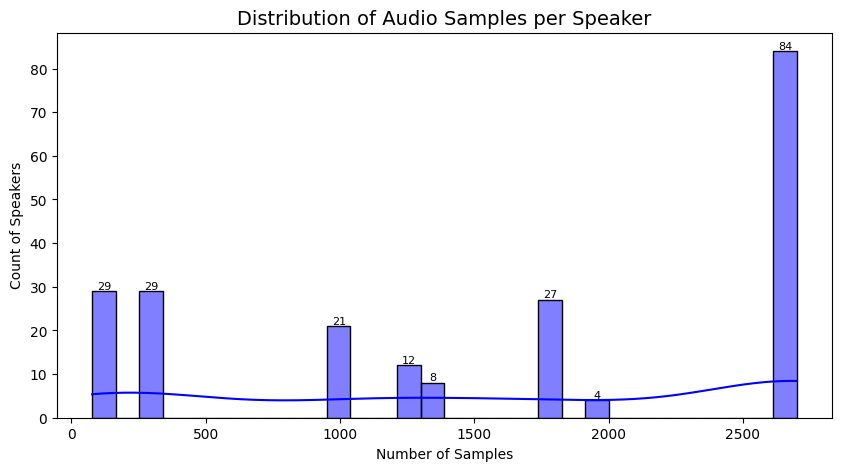

In [ ]:
# Count number of samples per speaker
speaker_counts = df_all["SpeakerID"].value_counts()

# Create figure
plt.figure(figsize=(10, 5))

# Create histogram plot
ax = sns.histplot(speaker_counts, bins=30, kde=True, color="blue")

# Adding exact numbers above bars**
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid adding labels to empty bins
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=8)

# Titles and labels
plt.title("Distribution of Audio Samples per Speaker", fontsize=14)
plt.xlabel("Number of Samples", fontsize=10)
plt.ylabel("Count of Speakers", fontsize=10)

# Show the plot
plt.show()


An audio sample distribution chart emerges which displays how audio samples spread among various speakers. The total number of samples appears on the x-axis next to the y-axis which shows how many speakers belong to each sample range. A smooth demonstration of distribution comes from the KDE line. The bar annotations display clear count data about the number of speakers who possess individual sample quantities thus supporting data interpretation. most speakers maintain low sample numbers yet some possess abundant samples overall

**Dataset Split Analysis**

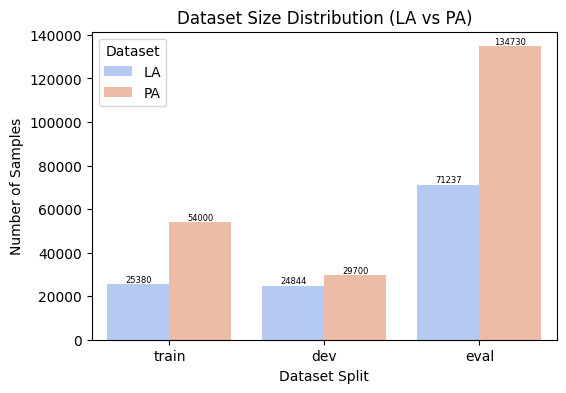

In [ ]:
# Create figure
plt.figure(figsize=(6, 4))

# Create count plot
ax = sns.countplot(data=df_all, x="Split", hue="Dataset", palette="coolwarm")

# Adding exact numbers above bars**
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=6)

# Titles and labels
plt.title("Dataset Size Distribution (LA vs PA)", fontsize=12)
plt.xlabel("Dataset Split", fontsize=10)
plt.ylabel("Number of Samples", fontsize=10)
plt.legend(title="Dataset")

# Show the plot
plt.show()


The model demonstrates the distributions between training and evaluation data and development instances through effective visualization of the sample counts across all three splits. A horizontal axis presents the dataset splits including train and dev and eval.
Y-axis: Represents the number of samples in each split. Different parts of the bar chart use color coding to identify dataset information either from LA or PA sources. Each of the train and dev splits contains smaller sample sets where LA and PA datasets present distinct size patterns. The majority of examples are present in the eval split particularly within the PA dataset which contains 134,730 samples. The dev split contains the minimum number of available samples.

**Audio Feature Extraction & Visualization (Waveform, Spectrogram, MFCC)**

**Key Takeaways from this Analysis**

Waveforms Analysis:

Real audios (bonafide) tend to have more natural variations.
Fake audios (spoof) may have distinct patterns due to synthesis artifacts.
Spectrogram Analysis:

Fake audios may have unnatural spectral patterns.
Some attack types might have distortions or different energy distributions.
MFCC Analysis:

Helps identify key frequency differences between real and fake audios.
Can be used as input features for machine learning models.

***Load an Example Real & Fake Audio***

In [ ]:
import librosa
import librosa.display
import numpy as np

# Define base paths for LA and PA audio files
audio_base_path_LA = "/content/LA/LA/ASVspoof2019_LA_train/flac"
audio_base_path_PA = "/content/PA/PA/ASVspoof2019_PA_train/flac"

# Get one real and one fake audio file from LA
real_audio_LA = df_all[(df_all["Dataset"] == "LA") & (df_all["AttackType"] == "bonafide")]["AudioID"].iloc[0] + ".flac"
fake_audio_LA = df_all[(df_all["Dataset"] == "LA") & (df_all["AttackType"] != "bonafide")]["AudioID"].iloc[0] + ".flac"

# Get one real and one fake audio file from PA
real_audio_PA = df_all[(df_all["Dataset"] == "PA") & (df_all["AttackType"] == "bonafide")]["AudioID"].iloc[0] + ".flac"
fake_audio_PA = df_all[(df_all["Dataset"] == "PA") & (df_all["AttackType"] != "bonafide")]["AudioID"].iloc[0] + ".flac"

# Load audio files for LA
real_audio_path_LA = os.path.join(audio_base_path_LA, real_audio_LA)
fake_audio_path_LA = os.path.join(audio_base_path_LA, fake_audio_LA)

# Load audio files for PA
real_audio_path_PA = os.path.join(audio_base_path_PA, real_audio_PA)
fake_audio_path_PA = os.path.join(audio_base_path_PA, fake_audio_PA)

# Load the real and fake audio signals
y_real_LA, sr_real_LA = librosa.load(real_audio_path_LA, sr=None)
y_fake_LA, sr_fake_LA = librosa.load(fake_audio_path_LA, sr=None)

y_real_PA, sr_real_PA = librosa.load(real_audio_path_PA, sr=None)
y_fake_PA, sr_fake_PA = librosa.load(fake_audio_path_PA, sr=None)

# Print information about the files
print(f"LA Real Audio: {real_audio_LA} | Sampling Rate: {sr_real_LA} | Duration: {len(y_real_LA)/sr_real_LA:.2f} sec")
print(f"LA Fake Audio: {fake_audio_LA} | Sampling Rate: {sr_fake_LA} | Duration: {len(y_fake_LA)/sr_fake_LA:.2f} sec")

print(f"PA Real Audio: {real_audio_PA} | Sampling Rate: {sr_real_PA} | Duration: {len(y_real_PA)/sr_real_PA:.2f} sec")
print(f"PA Fake Audio: {fake_audio_PA} | Sampling Rate: {sr_fake_PA} | Duration: {len(y_fake_PA)/sr_fake_PA:.2f} sec")


LA Real Audio: LA_T_1138215.flac | Sampling Rate: 16000 | Duration: 3.46 sec
LA Fake Audio: LA_T_1004644.flac | Sampling Rate: 16000 | Duration: 1.92 sec
PA Real Audio: PA_T_0000001.flac | Sampling Rate: 16000 | Duration: 3.05 sec
PA Fake Audio: PA_T_0005401.flac | Sampling Rate: 16000 | Duration: 3.19 sec


<ipython-input-8-2983f64566d9>:29: UserWarning: PySoundFile failed. Trying audioread instead.
  y_real_PA, sr_real_PA = librosa.load(real_audio_path_PA, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


The tool supports the processing and analysis of audio files obtained from LA (Logical Attack) and PA (Physical Attack) datasets within the ASVspoof 2019 challenge.

**Visualizing the Waveforms for LA & PA, Visualizing Spectrograms for LA & PA and Visualizing MFCCs for LA & PA**

* Load & Listen to Real & Fake Audio
* Visualize the Waveform
* Compute & Display the Mel-Spectrogram
* Extract & Analyze MFCCs (Mel-Frequency Cepstral Coefficients)
* Extract Chroma Features (Optional - to analyze pitch patterns)
* Compare Differences Between Real & Fake Audio

**Extract & Visualize Audio Features for Real & Fake Samples (LA & PA)**

Read filenames from protocol files (LA & PA)
Load real and fake audio samples
Listen to them
Visualize waveform, spectrogram, MFCC, and chroma features


📌 Logical Access (LA) - Real Audio Sample:

🔹 Filename: LA_T_1138215.flac | Label: Bonafide

🎧 Listen:


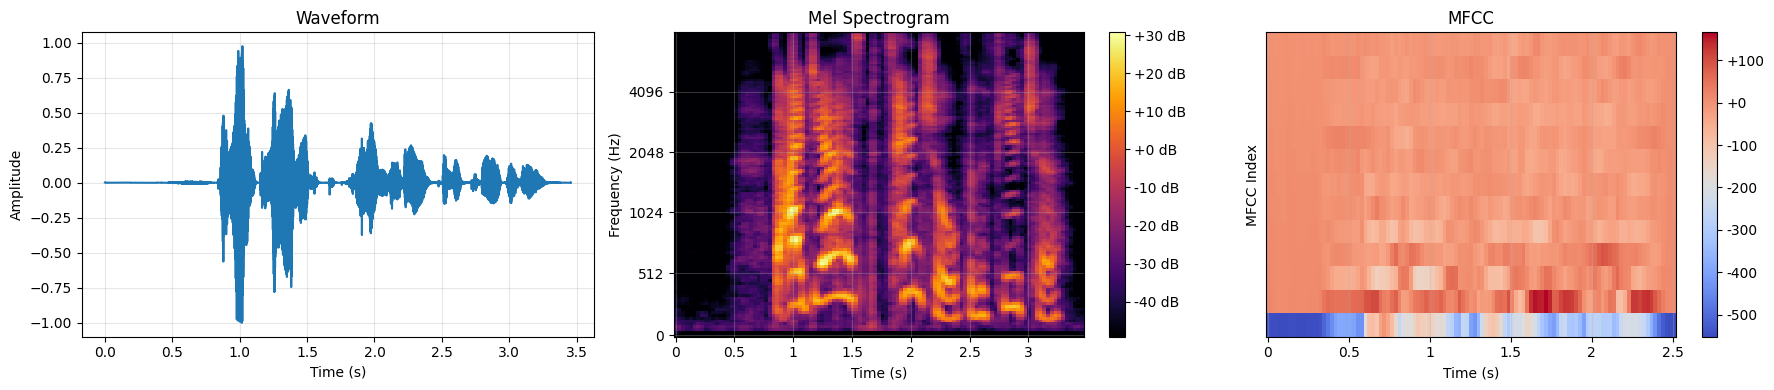


📌 Logical Access (LA) - Fake Audio Sample:

🔹 Filename: LA_T_1004644.flac | Label: Spoof

🎧 Listen:


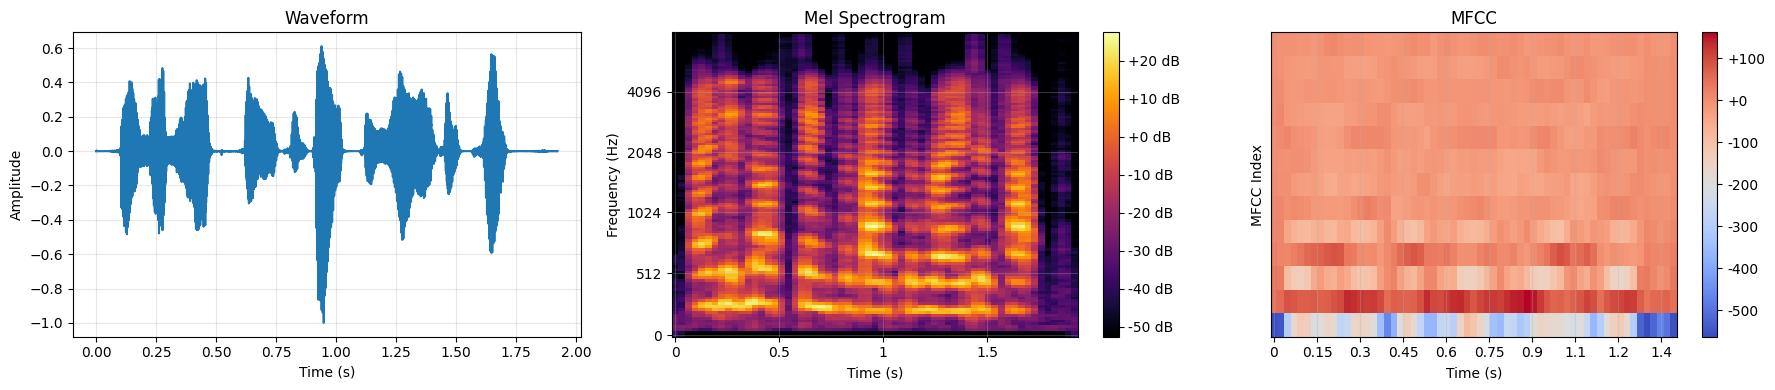


📌 Physical Access (PA) - Real Audio Sample:

🔹 Filename: PA_T_0000001.flac | Label: Bonafide

🎧 Listen:


<ipython-input-9-49867fedc6e5>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(path, sr=sr)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


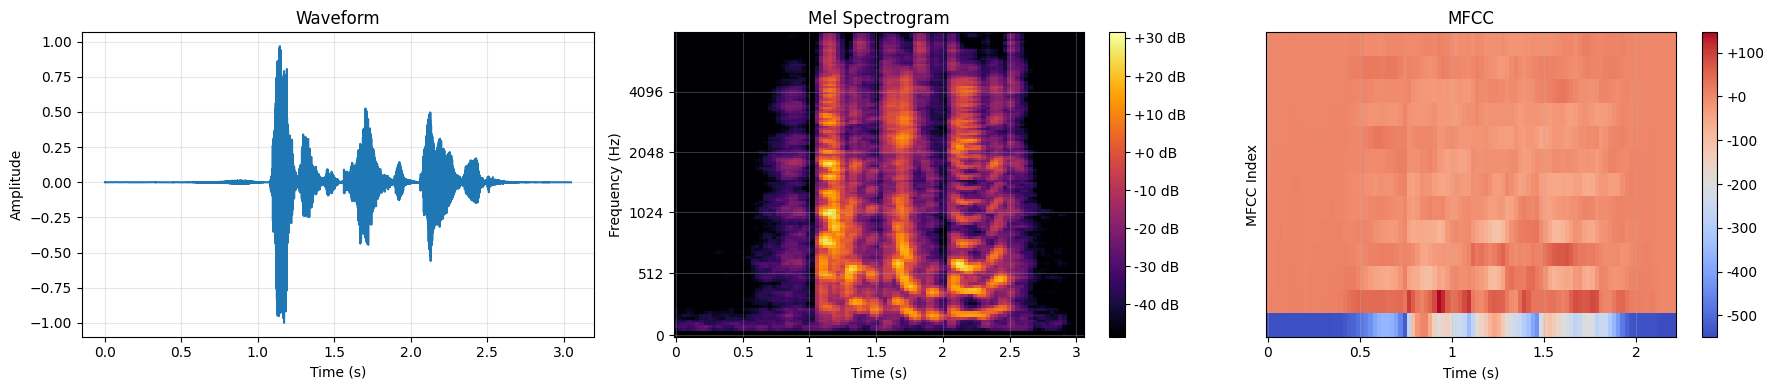


📌 Physical Access (PA) - Fake Audio Sample:

🔹 Filename: PA_T_0005401.flac | Label: Spoof

🎧 Listen:


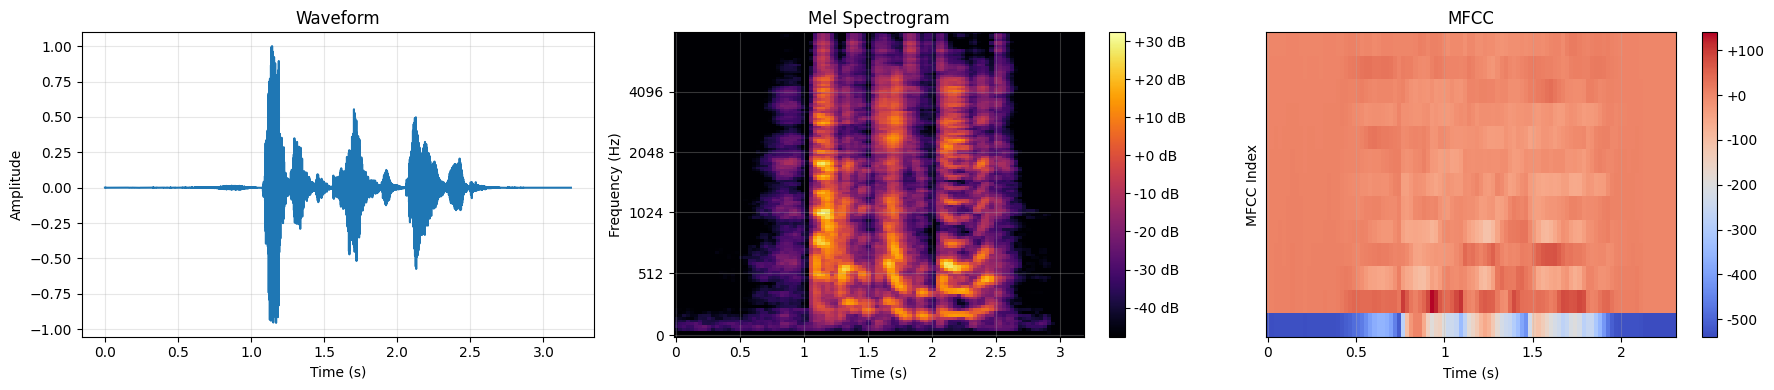

In [ ]:
import IPython.display as ipd

# Set constants
SAMPLE_RATE = 16000  # Common sampling rate for ASVspoof
N_MELS = 128  # Number of mel filterbanks
HOP_LEN = 512  # Hop length for STFT
N_FFT = 2048  # Number of FFT components
FMAX = 8000  # Maximum frequency


# 🔹 Function 1: Load audio file
def load_audio(path, sr=SAMPLE_RATE):
    audio, sr = librosa.load(path, sr=sr)
    return audio, sr

# 🔹 Function 2: Play audio file
def listen_audio(audio, sr=SAMPLE_RATE):
    ipd.display(ipd.Audio(audio, rate=sr))

# 🔹 Function 3: Plot waveform
def plot_waveform(ax, audio, sr, title):
    ax.plot(np.linspace(0, len(audio)/sr, num=len(audio)), audio)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Time (s)", fontsize=10)
    ax.set_ylabel("Amplitude", fontsize=10)
    ax.grid(alpha=0.3)

# 🔹 Function 4: Compute & plot Mel-Spectrogram
def get_spectrogram(audio):
    spec = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS,
                                          hop_length=HOP_LEN, n_fft=N_FFT, fmax=FMAX)
    return librosa.power_to_db(spec)

def plot_spectrogram(ax, spec, title):
    img = librosa.display.specshow(spec, x_axis="time", y_axis="mel", sr=SAMPLE_RATE, hop_length=HOP_LEN, cmap="inferno", ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Time (s)", fontsize=10)
    ax.set_ylabel("Frequency (Hz)", fontsize=10)
    ax.grid(alpha=0.3)
    plt.colorbar(img, ax=ax, format="%+2.0f dB")

# 🔹 Function 5: Compute & plot MFCCs
def get_mfcc(audio):
    return librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=13)

def plot_mfcc(ax, mfcc, title):
    img = librosa.display.specshow(mfcc, x_axis="time", cmap="coolwarm", ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Time (s)", fontsize=10)
    ax.set_ylabel("MFCC Index", fontsize=10)
    ax.grid(alpha=0.3)
    plt.colorbar(img, ax=ax, format="%+2.0f")

# 🔹 Function 6: Extract & Visualize Features for a Given Audio Sample
def analyze_audio(filepath, label):
    print(f"\n🔹 Filename: {os.path.basename(filepath)} | Label: {label}\n")

    # Load audio
    audio, sr = load_audio(filepath)

    # Listen to the audio
    print("🎧 Listen:")
    listen_audio(audio, sr)

    # Compute features
    spec = get_spectrogram(audio)
    mfcc = get_mfcc(audio)

    # Create subplots for visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # Adjusted size

    plot_waveform(axes[0], audio, sr, "Waveform")

    plot_spectrogram(axes[1], spec, "Mel Spectrogram")

    # Plot MFCC
    plot_mfcc(axes[2], mfcc, "MFCC")

    plt.tight_layout()
    plt.show()

# 🔹 Define paths to dataset directories
la_audio_dir = "/content/LA/LA/ASVspoof2019_LA_train/flac"
pa_audio_dir = "/content/PA/PA/ASVspoof2019_PA_train/flac"

# 🔹 Define paths to protocol files
protocol_file_LA = "/content/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"
protocol_file_PA = "/content/PA/PA/ASVspoof2019_PA_cm_protocols/ASVspoof2019.PA.cm.train.trn.txt"

# 🔹 Load protocol data
df_LA = pd.read_csv(protocol_file_LA, sep=" ", header=None, names=["SpeakerID", "AudioID", "Col1", "Col2", "AttackType"])
df_PA = pd.read_csv(protocol_file_PA, sep=" ", header=None, names=["SpeakerID", "AudioID", "Col1", "Col2", "AttackType"])

df_LA.drop(columns=["Col1", "Col2"], inplace=True)
df_PA.drop(columns=["Col1", "Col2"], inplace=True)

# 🔹 Select one real and one fake sample from LA & PA
real_audio_LA = os.path.join(la_audio_dir, df_LA[df_LA["AttackType"] == "bonafide"]["AudioID"].iloc[0] + ".flac")
fake_audio_LA = os.path.join(la_audio_dir, df_LA[df_LA["AttackType"] != "bonafide"]["AudioID"].iloc[0] + ".flac")

real_audio_PA = os.path.join(pa_audio_dir, df_PA[df_PA["AttackType"] == "bonafide"]["AudioID"].iloc[0] + ".flac")
fake_audio_PA = os.path.join(pa_audio_dir, df_PA[df_PA["AttackType"] != "bonafide"]["AudioID"].iloc[0] + ".flac")

# 🔹 Analyze LA dataset
print("\n📌 Logical Access (LA) - Real Audio Sample:")
analyze_audio(real_audio_LA, "Bonafide")

print("\n📌 Logical Access (LA) - Fake Audio Sample:")
analyze_audio(fake_audio_LA, "Spoof")

# 🔹 Analyze PA dataset
print("\n📌 Physical Access (PA) - Real Audio Sample:")
analyze_audio(real_audio_PA, "Bonafide")

print("\n📌 Physical Access (PA) - Fake Audio Sample:")
analyze_audio(fake_audio_PA, "Spoof")


The presented output contains four sets of graphic representations which display real audio against fake audio originating from Logical Access (LA) and Physical Access (PA) dataset samples. The visualization set contains three essential elements which are waveforms alongside Mel spectrogram and Mel-frequency cepstral coefficient displays. The waveform shows how audio signal amplitude changes across time with clear indications of the audio range variation. The Mel spectrogram displays audio frequency content variations across different time frequencies where natural audio examples exhibit typical patterns than synthetic audio which reveals synthesis artifacts. The MFCC representation evaluates significant frequency aspects which expose distinctions between real and fake audio files for additional assessment.

In [ ]:
import os
import pandas as pd
import numpy as np
import librosa
import warnings

warnings.filterwarnings("ignore")

# Constants
SAMPLE_RATE = 16000
N_MFCC = 13
SAMPLE_SIZE = 300  # 150 bonafide + 150 spoof per dataset

# Dataset paths
base_path = "/content"
datasets = {
    "LA": {
        "protocol": os.path.join(base_path, "LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"),
        "audio": os.path.join(base_path, "LA/LA/ASVspoof2019_LA_train/flac")
    },
    "PA": {
        "protocol": os.path.join(base_path, "PA/PA/ASVspoof2019_PA_cm_protocols/ASVspoof2019.PA.cm.train.trn.txt"),
        "audio": os.path.join(base_path, "PA/PA/ASVspoof2019_PA_train/flac")
    }
}

# Load and sample
def load_sampled_df(protocol_path, dataset_name, sample_size):
    df = pd.read_csv(protocol_path, sep=" ", header=None,
                     names=["SpeakerID", "AudioID", "Col1", "Col2", "AttackType"])
    df.drop(columns=["Col1", "Col2"], inplace=True)
    df["Dataset"] = dataset_name
    return df.groupby("AttackType", group_keys=False).apply(
        lambda x: x.sample(min(len(x), sample_size // 2), random_state=42)
    ).reset_index(drop=True)

# Feature extraction
all_features = []

for name, paths in datasets.items():
    df = load_sampled_df(paths["protocol"], name, SAMPLE_SIZE)
    for _, row in df.iterrows():
        file_path = os.path.join(paths["audio"], row["AudioID"] + ".flac")
        if not os.path.exists(file_path):
            continue
        try:
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            duration = librosa.get_duration(y=y, sr=sr)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
            centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()

            row_dict = {
                "Dataset": name,
                "AudioID": row["AudioID"],
                "SpeakerID": row["SpeakerID"],
                "AttackType": row["AttackType"],
                "Duration": duration,
                "SpectralCentroid": centroid,
            }

            for i in range(N_MFCC):
                row_dict[f"MFCC_mean_{i+1}"] = mfcc[i].mean()
                row_dict[f"MFCC_std_{i+1}"] = mfcc[i].std()
                row_dict[f"MFCC_var_{i+1}"] = np.var(mfcc[i])

            all_features.append(row_dict)

        except Exception as e:
            print(f"Skipping {row['AudioID']} due to error: {e}")
            continue

features_df = pd.DataFrame(all_features)
print("Features_df:", features_df.shape)
features_df.head()


Features_df: (600, 45)


,Dataset,AudioID,SpeakerID,AttackType,Duration,SpectralCentroid,MFCC_mean_1,MFCC_std_1,MFCC_var_1,MFCC_mean_2,...,MFCC_var_10,MFCC_mean_11,MFCC_std_11,MFCC_var_11,MFCC_mean_12,MFCC_std_12,MFCC_var_12,MFCC_mean_13,MFCC_std_13,MFCC_var_13
0,LA,LA_T_3891170,LA_0085,bonafide,3.966937,1762.543950,-335.683228,142.719879,20368.964844,50.050442,...,135.705872,-3.860395,9.098845,82.788994,-1.599358,8.611304,74.154556,-0.232598,7.589166,57.595436
1,LA,LA_T_2948101,LA_0097,bonafide,4.479625,1992.767278,-348.797760,133.007614,17691.025391,51.896755,...,90.924454,-8.637941,10.917687,119.195900,-2.959586,9.209986,84.823830,-5.479351,5.753535,33.103161
2,LA,LA_T_8919107,LA_0084,bonafide,2.425750,1613.564237,-386.200043,185.628860,34458.074219,54.717537,...,130.537994,-8.775884,11.450529,131.114609,-4.400430,12.946630,167.615250,0.106339,7.684346,59.049168
3,LA,LA_T_6650735,LA_0081,bonafide,2.941688,1959.702865,-300.548248,158.333344,25069.449219,53.024220,...,210.780640,2.056621,11.557655,133.579407,-4.234069,12.409328,153.991440,-4.660745,7.082997,50.168854
4,LA,LA_T_5362691,LA_0086,bonafide,4.052625,1859.529756,-287.757477,141.232300,19946.564453,63.184444,...,122.986206,-11.777555,12.995560,168.884583,-4.088364,9.596669,92.096062,-11.472594,8.278390,68.531746


**Correlation Analysis**

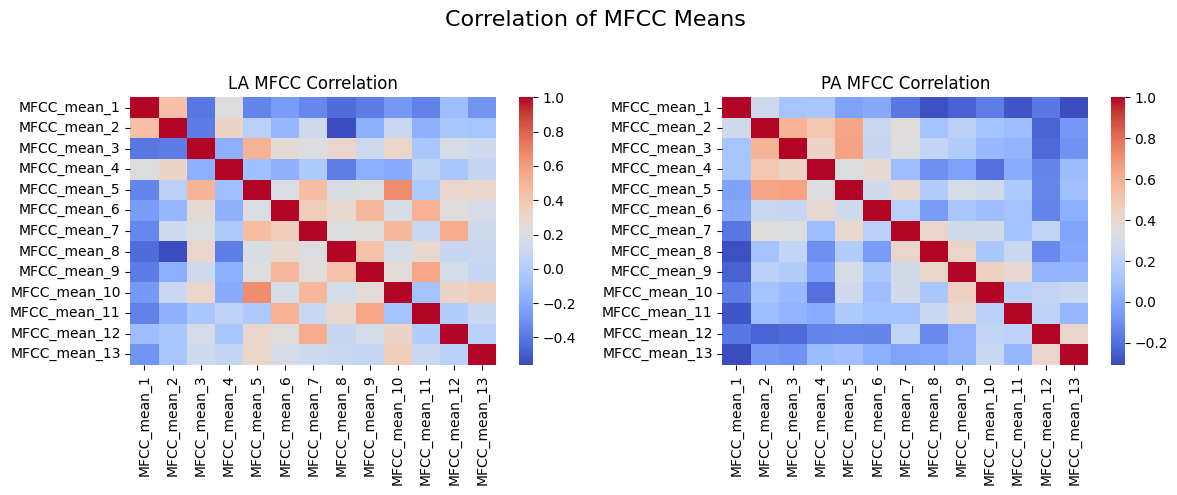

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ----- 1. Correlation Analysis (LA vs PA separately) -----
mfcc_cols = [col for col in features_df.columns if "MFCC_mean" in col]

# Correlation for LA
la_corr = features_df[features_df["Dataset"] == "LA"][mfcc_cols].corr()
pa_corr = features_df[features_df["Dataset"] == "PA"][mfcc_cols].corr()

plt.figure(figsize=(12, 5))
plt.suptitle("Correlation of MFCC Means", fontsize=16)

plt.subplot(1, 2, 1)
sns.heatmap(la_corr, annot=False, cmap="coolwarm")
plt.title("LA MFCC Correlation")

plt.subplot(1, 2, 2)
sns.heatmap(pa_corr, annot=False, cmap="coolwarm")
plt.title("PA MFCC Correlation")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Descriptive Statistics**

In [ ]:
desc_stats = features_df.describe()
display(desc_stats)

,Duration,SpectralCentroid,MFCC_mean_1,MFCC_std_1,MFCC_var_1,MFCC_mean_2,MFCC_std_2,MFCC_var_2,MFCC_mean_3,MFCC_std_3,...,MFCC_var_10,MFCC_mean_11,MFCC_std_11,MFCC_var_11,MFCC_mean_12,MFCC_std_12,MFCC_var_12,MFCC_mean_13,MFCC_std_13,MFCC_var_13
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.815678,1823.604031,-313.859924,161.952377,27058.720703,61.366024,47.107033,2324.105469,-4.387849,35.126019,...,149.216843,-7.963286,10.193901,109.174515,-3.379217,8.975671,84.326637,-6.112862,8.613285,78.499207
std,1.195686,413.001883,48.153320,28.836279,9333.845703,24.203558,10.257108,1000.325256,13.388051,8.212232,...,71.780968,4.896064,2.295137,49.376530,5.307136,1.941715,36.889709,5.310742,2.077910,39.091152
min,1.145500,449.154854,-444.915649,71.676620,5137.538086,-32.929054,15.456238,238.895279,-56.726761,15.999999,...,26.693203,-23.562943,3.997962,15.983705,-21.143932,3.318316,11.011224,-25.534121,3.664225,13.426548
25%,2.912438,1569.477978,-346.469345,142.772537,20383.999512,50.930487,40.912363,1673.821777,-10.915365,29.326354,...,99.813086,-11.233804,8.660197,74.999014,-6.745710,7.612531,57.950718,-9.119554,7.103899,50.465519
50%,3.708281,1759.100283,-317.363892,163.080063,26595.108398,62.447756,46.595661,2171.156250,-2.210008,34.485540,...,134.523903,-7.791424,9.997638,99.952774,-3.843853,8.807820,77.578087,-5.638569,8.307525,69.014973
75%,4.597844,1983.522940,-278.980911,178.736732,31946.825195,73.731777,53.816465,2896.212463,4.651500,40.743565,...,183.832680,-4.810988,11.653659,135.807762,-0.184181,10.155401,103.132179,-2.459426,9.809466,96.225634
max,9.188562,3858.695467,-188.854813,253.241577,64131.292969,157.515427,83.098999,6905.443848,31.120163,64.001289,...,431.618469,7.483289,17.648161,311.457581,17.258396,16.128176,260.118073,12.941649,16.210672,262.785919


**Boxplot Analysis for MFCC Outliers**

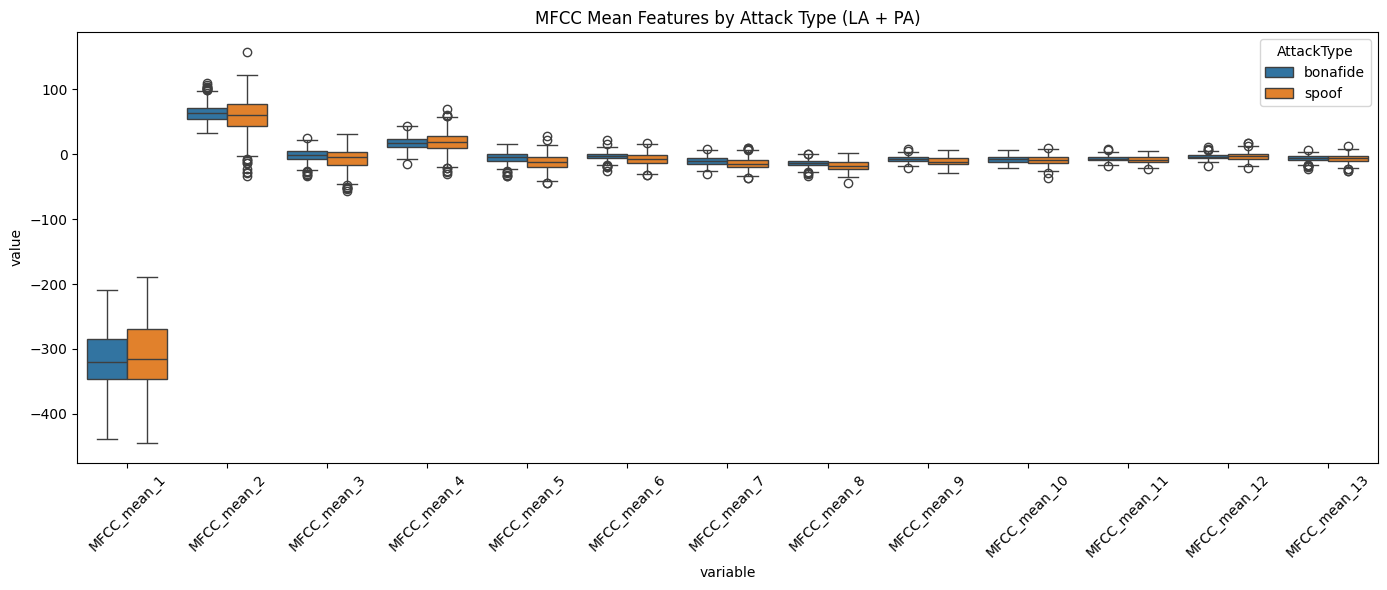

In [ ]:
# ----- 2. Boxplot of MFCC Features -----
melted_df = features_df.melt(id_vars=["AttackType", "Dataset"], value_vars=mfcc_cols)

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_df, x="variable", y="value", hue="AttackType")
plt.title("MFCC Mean Features by Attack Type (LA + PA)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Audio Duration Analysis**

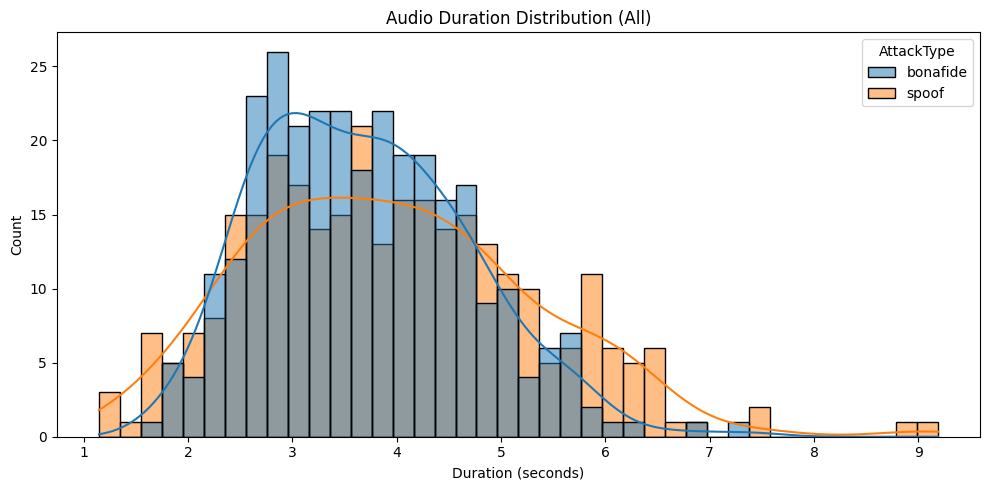

In [ ]:
# ----- 3. Duration Histogram -----
plt.figure(figsize=(10, 5))
sns.histplot(data=features_df, x="Duration", hue="AttackType", kde=True, bins=40)
plt.title("Audio Duration Distribution (All)")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Compare average duration per class**

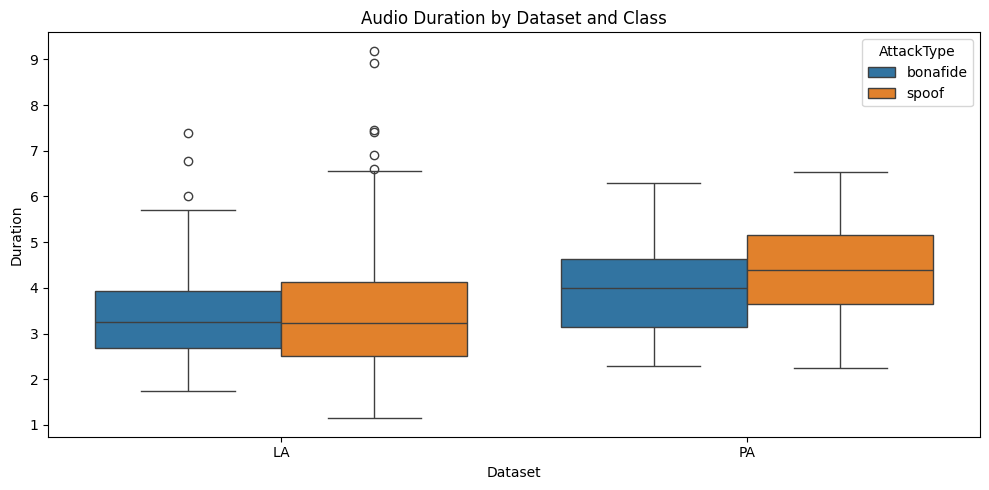

In [ ]:
# Duration by Dataset
plt.figure(figsize=(10, 5))
sns.boxplot(data=features_df, x="Dataset", y="Duration", hue="AttackType")
plt.title("Audio Duration by Dataset and Class")
plt.tight_layout()
plt.show()

**Speaker-wise Spoofed Sample Counts**

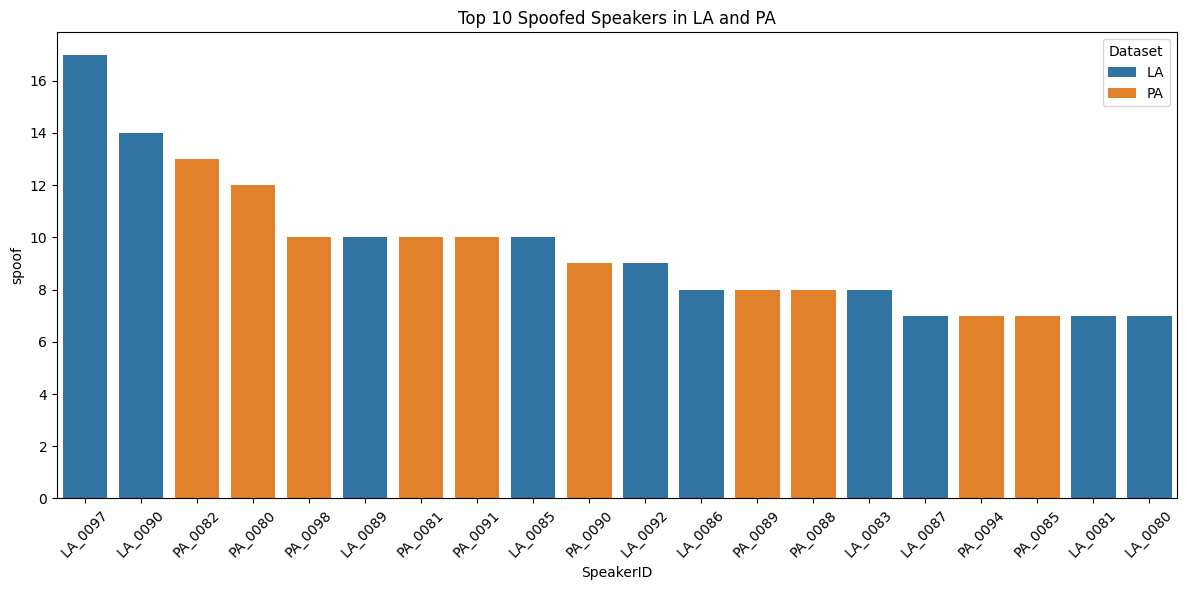

In [ ]:
# ----- 4. Speaker-wise Spoofed Sample Counts -----
speaker_df = features_df.groupby(["Dataset", "SpeakerID", "AttackType"]).size().unstack(fill_value=0).reset_index()
top_speakers = speaker_df.sort_values(by="spoof", ascending=False).groupby("Dataset").head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_speakers, x="SpeakerID", y="spoof", hue="Dataset")
plt.title("Top 10 Spoofed Speakers in LA and PA")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()